# Predicting the age of Abalone

### Load essential scientific libraries

In [1]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Import data

In [2]:
DATAPATH ='/content/abalone (1).zip'

# Open the zip file
with zipfile.ZipFile(DATAPATH, 'r') as zip_ref:
    # the CSV file is named 'abalone.data'
    csv_file_path = 'abalone.data'
    with zip_ref.open(csv_file_path) as f:
        # Read the CSV file from within the zip
        data = pd.read_csv(f, header=None, index_col=False)

# Set column names
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
print(data.head())

  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [3]:
data

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.dropna(inplace=True) #droping rows with missing values

In [5]:
# Set column names
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
print(data.head())

#'sex' is a categorical feature
data = pd.get_dummies(data, columns=['sex'], drop_first=True)

  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [6]:
x=data.drop('rings' , axis=1)
y=data['rings']

In [7]:
x.shape,y.shape

((4177, 9), (4177,))

In [8]:
print(x)

      length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      shell_weight  sex_I  sex_M  
0   

In [9]:
print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 4177, dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

print(X)

[[-0.57455813 -0.43214879 -1.06442415 ... -0.63821689 -0.68801788
   1.31667716]
 [-1.44898585 -1.439929   -1.18397831 ... -1.21298732 -0.68801788
   1.31667716]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.20713907 -0.68801788
  -0.75948762]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.49695471 -0.68801788
   1.31667716]
 [ 0.84118198  0.77718745  0.25067161 ...  0.41073914 -0.68801788
  -0.75948762]
 [ 1.54905203  1.48263359  1.32665906 ...  1.84048058 -0.68801788
   1.31667716]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3132, 9), (1045, 9), (3132,), (1045,))

# Linear Regression

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = pd.DataFrame(data)

# Calculate MSE ,R2 and MAPE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)

print("Linear Regression")
print(f'Mean Squared Error(MSE): {mse}')
print(f'R^2 Score(R2): {r2}')
print(f'Mean absolute error(MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Mean absolute percentage error(MAPE): {MAPE}')

Linear Regression
Mean Squared Error(MSE): 4.675903975878893
R^2 Score(R2): 0.5454718270324015
Mean absolute error(MAE): 1.5693587109234122
Mean absolute percentage error(MAPE): 0.15965791631435214


In [15]:
print('coefficients:', model.coef_)
print('intercept:', model.intercept_)

coefficients: [-0.01181726  1.1109743   0.42523307  4.35585308 -4.56883544 -1.05634026
  1.31920163 -0.34444598  0.04830621]
intercept: 9.946689097390808


# Support Vector Machine(SVM):

In [16]:
# List of kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

In [17]:
result_dict = {}

# Loop over each kernel
for i, kernel in enumerate(kernels):
    # Initialize and fit the model
    model_svm = SVR(kernel=kernel)
    model_svm.fit(X_train, y_train)

    # Predict on the test set
    pred_svm = model_svm.predict(X_test)

    # Store evaluation metrics
    result_dict[kernel] = [
        mean_squared_error(y_test, pred_svm),
        mean_absolute_error(y_test, pred_svm),
        mean_absolute_percentage_error(y_test, pred_svm),
        r2_score(y_test, pred_svm)
    ]

# Converting results to a DataFrame
result = pd.DataFrame(result_dict, index=['MSE', 'MAE', 'MAPE', 'R2'])

# Transpose the DataFrame for better readability
result = result.T
print(result)

             MSE       MAE      MAPE        R2
linear  4.787821  1.526835  0.147773  0.534593
poly    5.417661  1.547262  0.147370  0.473368
rbf     4.624634  1.480563  0.142486  0.550456


# Hyperparameter Tuning

###  Grid search

In [18]:
hpt_svm_reg = SVR(kernel = "rbf")
hpt_svm_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
# take the parameters to tune as 'C' and 'gamma'
hpt_param_grid = [{'C':[i for i in range(1,10)],
                   'gamma' : np.linspace(0,0.1)}]
hpt_param_grid

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
         0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
         0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
         0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
         0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
         0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
         0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
         0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
         0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
         0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}]

In [20]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = hpt_param_grid,
                          cv = 5)

In [21]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [22]:
print(grid_search.best_params_)

{'C': 9, 'gamma': 0.05510204081632654}


In [23]:
score_rbf_grid=print(grid_search.best_score_)
score_rbf_grid

0.561711353072861


In [24]:
svm_rbf = SVR(kernel='rbf',C=900, gamma=0.01)

svm_rbf.fit(X_train, y_train)
score_svm_rbf = svm_rbf.score(X_test, y_test)

print(score_svm_rbf)

0.5759845489697898


###  Random Search

In [ ]:
hpt_param_dict = {'C' : [i for i in range(0,100)],
                 'gamma' : np.linspace(0,0.1)}


In [ ]:
!pip install scikit-learn
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = hpt_svm_reg,
                                  param_distributions = hpt_param_dict,
                                  cv = 5)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14, 15, 16, 17, 18,
                                              19, 20, 21, 22, 23, 24, 25, 26,
                                              27, 28, 29, ...],
                                        'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])})

In [ ]:
random_search.best_params_

{'gamma': 0.02653061224489796, 'C': 30}

In [ ]:
random_search.best_score_

0.5611785091847991

In [ ]:
svm_rbf_rnd = SVR(kernel='rbf',C=9000, gamma=0.004)

svm_rbf_rnd.fit(X_train, y_train)
score_svm_rbf_rnd = svm_rbf_rnd.score(X_test, y_test)

print(score_svm_rbf_rnd)

0.5759590316168088


# Decision tree

In [25]:
# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing data
y_pred1 = decision_tree.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mape= mean_absolute_percentage_error(y_test, y_pred1)

print("Decision Tree Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Decision Tree Regressor
Mean Squared Error (MSE): 8.574162679425838
R-squared (R2) Score: 0.1665358147835212
Mean absolute error(MAE) 2.02
Mean absolute percentage error(MAPE) 0.20


# Decision tree with hyperparametric tuning

# Hyperparametric Tuning

### Grid Search

In [26]:
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [27]:
hyperpt_decision_tree = DecisionTreeRegressor(random_state=42)
hyperpt_decision_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [28]:
hyperpt_param_grid1 = [{'max_depth': [i for i in range(1, 20)],
                       'max_features': [i for i in range(1, 8)],
                       'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}]
hyperpt_param_grid1

[{'max_depth': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19],
  'max_features': [1, 2, 3, 4, 5, 6, 7],
  'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}]

In [29]:
grid_search_decision_tree = GridSearchCV(estimator = hyperpt_decision_tree,
                   param_grid = hyperpt_param_grid1,
                   cv=5)

In [30]:
grid_search_decision_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}])

In [31]:
grid_search_decision_tree.best_params_

{'max_depth': 7, 'max_features': 3, 'max_leaf_nodes': 40}

In [32]:
grid_search_decision_tree.best_score_

0.48016460355736346

In [33]:
grid_search_decision_tree.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features=3, max_leaf_nodes=40,
                      random_state=42)

In [34]:
dt = DecisionTreeRegressor(max_depth=7,max_features=3, max_leaf_nodes=45, random_state=42)
dt.fit(X_train,y_train)
score_dt = dt.score(X_test,y_test)
print(score_dt)

0.45304304343514323


### Random Search

In [43]:
# the hyperparameter to tune as max_depth
hyp_param_dict2 = [{'max_depth' : [i for i in range(0,20)]}]
hyp_param_dict2

[{'max_depth': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]}]

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

hyp_dec_tree = DecisionTreeRegressor()

decisiontree_rnd = RandomizedSearchCV(estimator = hyp_dec_tree,
                   param_distributions = hyp_param_dict2,
                   cv=5)

In [47]:
decisiontree_rnd.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19]}])

In [48]:
decisiontree_rnd.best_params_

{'max_depth': 6}

In [49]:
decisiontree_rnd.best_estimator_

DecisionTreeRegressor(max_depth=6)

In [50]:
decisiontree_rnd.best_score_

0.4680844971950314

In [51]:
dt_rand = DecisionTreeRegressor(max_depth=4,random_state=42)
dt_rand.fit(X_train,y_train)

score_dt_rand = dt_rand.score(X_test,y_test)
print(score_dt_rand)

0.4715833401163033


# Random Forest

In [35]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred2 = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mape= mean_absolute_percentage_error(y_test, y_pred2)


print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Random Forest Regressor
Mean Squared Error (MSE): 4.815609377990431
R-squared (R2) Score: 0.5318915564573357
Mean absolute error(MAE) 1.57
Mean absolute percentage error(MAPE) 0.16


# Hyperparametric Tuning

### Grid Search

In [37]:
hyp_random_forest = RandomForestRegressor(random_state=42)
hyp_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [38]:
hyp_grid = [{'n_estimators' : [i for i in range(10,200,10)]},
                  {'max_depth':[j for j in range(10)]}]
hyp_grid

[{'n_estimators': [10,
   20,
   30,
   40,
   50,
   60,
   70,
   80,
   90,
   100,
   110,
   120,
   130,
   140,
   150,
   160,
   170,
   180,
   190]},
 {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [39]:
grid_search = GridSearchCV(estimator = hyp_random_forest,
                          param_grid = hyp_grid,
                          cv = 5)

In [40]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100, 110, 120, 130, 140, 150, 160,
                                           170, 180, 190]},
                         {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [41]:
grid_search.best_params_

{'max_depth': 9}

In [42]:
grid_search.best_score_

0.5496856459913332

In [43]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=9, random_state=42)

In [44]:
rand_for = RandomForestRegressor(max_depth = 9, n_estimators = 200,random_state = 42)
rand_for.fit(X_train,y_train)
score_rand_for = rand_for.score(X_test,y_test)
print(score_rand_for)

0.543162589973887


### Random search

In [ ]:
hyp_grid2 = [{'n_estimators' : [i for i in range(0,10)]},
                  {'max_depth':[j for j in range(10)]}]
hyp_grid2

[{'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [ ]:
randomforest_rd = RandomizedSearchCV( estimator = hyp_random_forest,
                                   param_distributions = hyp_grid2,
                                    cv=5)

In [ ]:
randomforest_rd.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'n_estimators': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9]},
                                        {'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                       8, 9]}])

In [ ]:
randomforest_rd.best_params_

{'max_depth': 6}

In [ ]:
randomforest_rd.best_estimator_

RandomForestRegressor(max_depth=6, random_state=42)

In [ ]:
randomforest_rd.best_score_

0.543306081621124

In [ ]:
rand_for_rd = RandomForestRegressor(max_depth = 9,n_estimators =1000,random_state=42)
rand_for_rd.fit(X_train,y_train)

score_rand_for_rd = rand_for_rd.score(X_test,y_test)
print(score_rand_for_rd)

0.5464172433309769


# Adaboost

In [45]:
# Using DecisionTreeRegressor with a max depth of 3 as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42, n_estimators=50)
adaboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=42)

In [47]:
y_pred3 = adaboost.predict(X_test)

mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
mape= mean_absolute_percentage_error(y_test, y_pred3)


print("Adaboost Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Adaboost Regressor
Mean Squared Error (MSE): 8.791322472019772
R-squared (R2) Score: 0.14542647543888876
Mean absolute error(MAE) 2.55
Mean absolute percentage error(MAPE) 0.29


### Hyperparametric tuning

### grid search

In [48]:
hyp_adaboost = AdaBoostRegressor(random_state=42)
hyp_adaboost.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [49]:
#  hyperparameters to tune as 'learning_rate' and 'n_estimators'
hyp_gridsrch = [{'learning_rate': np.linspace(0.1,1 ,10),
                'n_estimators': [j for j in range(10,101,10)]}]
hyp_gridsrch

[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [50]:
ada_boost = GridSearchCV(estimator = hyp_adaboost,
                        param_grid = hyp_gridsrch,
                        cv=5)

In [51]:
ada_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [52]:
ada_boost.best_params_

{'learning_rate': 0.30000000000000004, 'n_estimators': 10}

In [53]:
ada_boost.best_score_

0.4445099866824263

In [54]:
ada_boost_ = AdaBoostRegressor(learning_rate = 0.44,n_estimators=10)
ada_boost_.fit(X_train,y_train)

score_ada_boost_ = ada_boost_.score(X_test,y_test)
print(score_ada_boost_)

0.46692388221657977


### random search

In [ ]:
# the hyperparameters to tune as 'learning_rate' and 'n_estimators'
hyp_rand = [{'learning_rate': np.linspace(0.1,1 ,10),
                'n_estimators': [j for j in range(10,101,10)]}]
hyp_rand

[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [ ]:
ada_boost1 = RandomizedSearchCV(estimator = hyp_adaboost,
                        param_distributions = hyp_rand,
                        cv=5)
ada_boost1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   param_distributions=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90,
                                                          100]}])

In [ ]:
ada_boost1.best_params_

{'n_estimators': 10, 'learning_rate': 0.4}

In [ ]:
ada_boost1.best_score_

0.42885938087694875

In [ ]:
ada_boost_rnd = AdaBoostRegressor(n_estimators = 29,learning_rate=0.30000000000000004)
ada_boost_rnd.fit(X_train,y_train)

score_ada_boost_rnd = ada_boost_rnd.score(X_test,y_test)
print(score_ada_boost_rnd)

0.4114045043631094


# Gradient Boosting

In [55]:
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [56]:
y_pred4 = gradient_boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
mape= mean_absolute_percentage_error(y_test, y_pred4)


print("Gradient Boosting Regressor")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("Mean absolute error(MAE) %.2f"%mae)
print("Mean absolute percentage error(MAPE) %.2f"%mape)

Gradient Boosting Regressor
Mean Squared Error (MSE): 4.736128274813973
R-squared (R2) Score: 0.5396176348367476
Mean absolute error(MAE) 1.54
Mean absolute percentage error(MAPE) 0.15


### Hyperparametric tuning

### grid search

In [57]:
hyp_gradient_boost = GradientBoostingRegressor(random_state=42)
hyp_gradient_boost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [58]:
# hyperparameters to tune as 'max_depth' and 'n_estimators'
hyp_gridsrch = [{'max_depth' : [i for i in range(1,10)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hyp_gridsrch

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}]

In [59]:
grid_srch = GridSearchCV(estimator=hyp_gradient_boost,
                       param_grid=hyp_gridsrch,
                       cv=5)

In [60]:
grid_srch.fit(  X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [61]:
grid_srch.best_params_

{'max_depth': 4, 'n_estimators': 61}

In [62]:
grid_srch.best_score_

0.5584925376653727

In [63]:
grd_boost = GradientBoostingRegressor(max_depth = 4, n_estimators = 71)
grd_boost.fit(X_train,y_train)

score_grd_boost = grd_boost.score(X_test,y_test)
print(score_grd_boost)

0.5356452012811987


### Random search

In [ ]:
hyp_ran = [{'max_depth' : [i for i in range(1,10)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hyp_ran

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}]

In [ ]:
ran_srch = GridSearchCV(estimator = hyp_gradient_boost,
                       param_grid = hyp_ran,
                       cv =5)

In [ ]:
ran_srch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [ ]:
ran_srch.best_params_

{'max_depth': 4, 'n_estimators': 61}

In [ ]:
ran_srch.best_score_

0.5584925376653727

In [ ]:
grd_boost_rnd = GradientBoostingRegressor(n_estimators = 81,max_depth = 4)
grd_boost_rnd.fit(X_train,y_train)

score_grd_boost_rnd = grd_boost_rnd.score(X_test,y_test)
print(score_grd_boost_rnd)

0.5356717941785116


# Results

In [64]:
M= [ 'Linear Regression','SVM(linear)','SVM(poly)','SVM(rbf)','Decision Tree','Random Forest','Adaboost','Gradient Boosting']
MSE=[4.6759,4.7880,5.4239,4.6270,8.8076,4.8052,9.0149,4.7367]
R2=[0.5454,0.5345,0.4727, 0.5502,0.1438,0.5328,0.1236,0.5395]
MAE=[1.5693,1.5268,1.5472,1.4807,2.04,1.56,2.60,1.54]
MAPE=[0.1596,0.14777,0.14738,0.14249,0.20, 0.16, 0.29,0.15]

In [65]:
# Creating a DataFrame
data = {
    'Model': M,
    'MSE': MSE,
    'R2': R2,
    'MAE': MAE,
    'MAPE':MAPE,
}
df = pd.DataFrame(data)


print(df)

               Model     MSE      R2     MAE     MAPE
0  Linear Regression  4.6759  0.5454  1.5693  0.15960
1        SVM(linear)  4.7880  0.5345  1.5268  0.14777
2          SVM(poly)  5.4239  0.4727  1.5472  0.14738
3           SVM(rbf)  4.6270  0.5502  1.4807  0.14249
4      Decision Tree  8.8076  0.1438  2.0400  0.20000
5      Random Forest  4.8052  0.5328  1.5600  0.16000
6           Adaboost  9.0149  0.1236  2.6000  0.29000
7  Gradient Boosting  4.7367  0.5395  1.5400  0.15000


<ipython-input-66-bbf63f37246b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-66-bbf63f37246b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-66-bbf63f37246b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(df['Model'], rotation=45, ha='right')


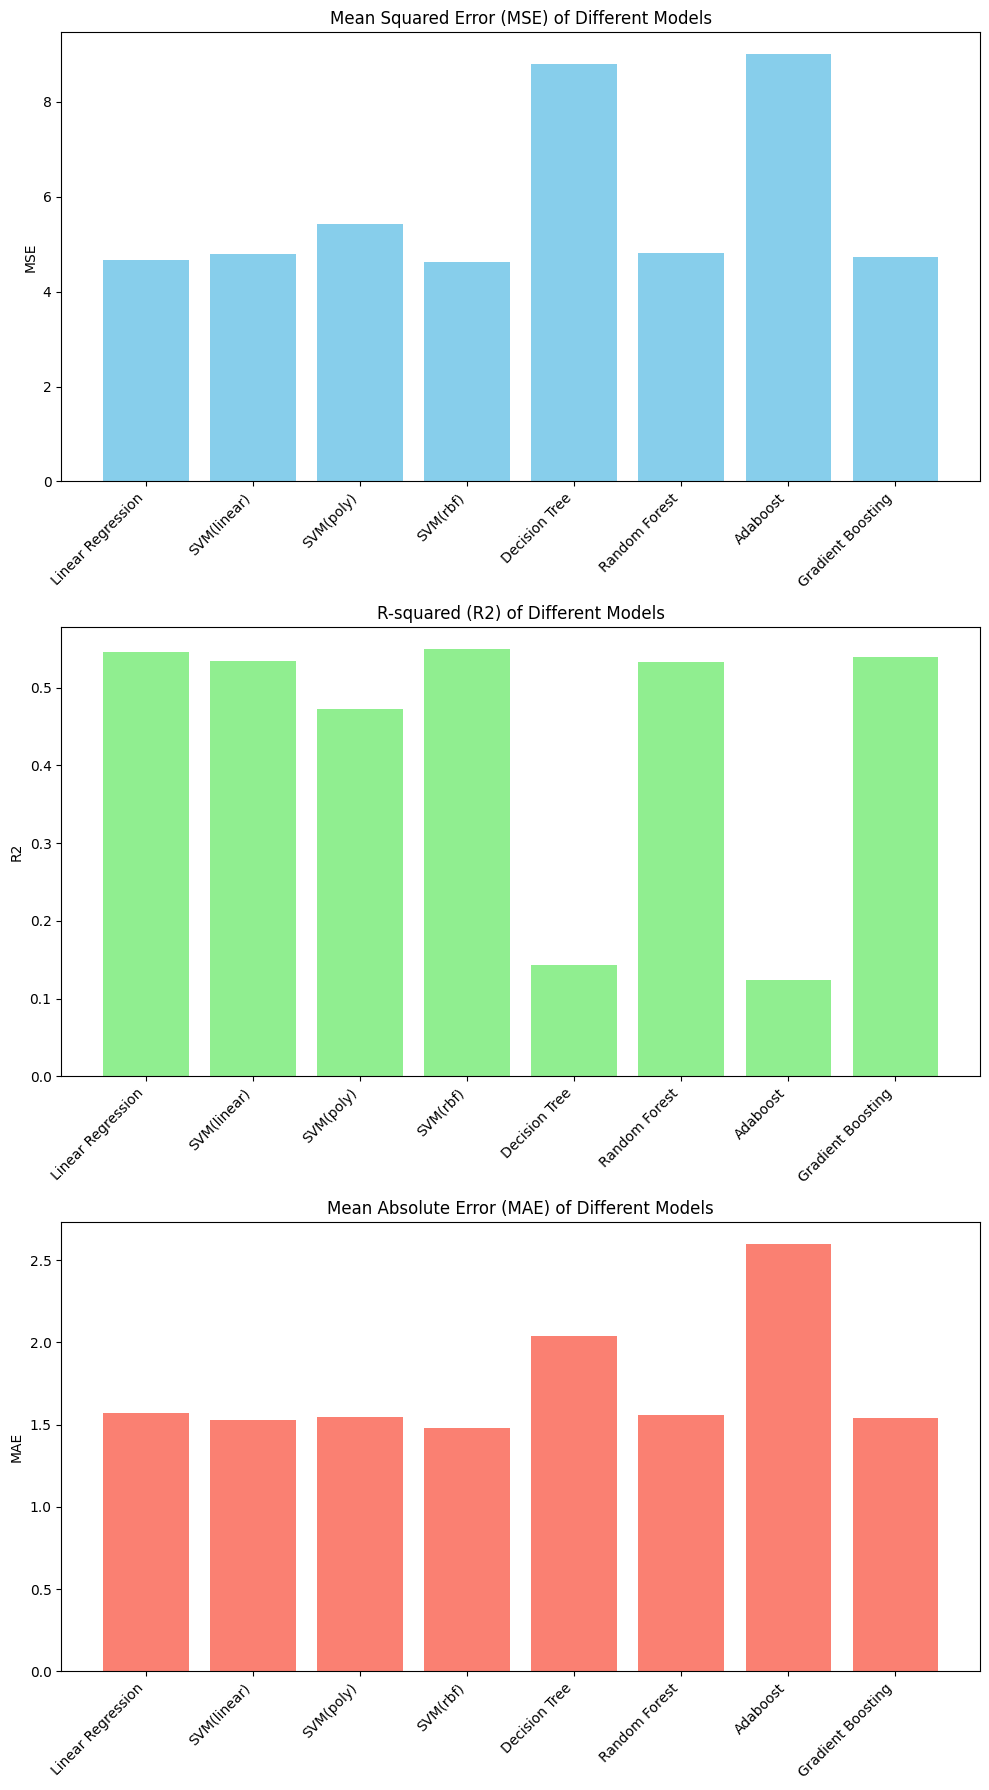

In [66]:
# Plotting the bar graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plotting MSE
axs[0].bar(df['Model'], df['MSE'], color='skyblue')
axs[0].set_title('Mean Squared Error (MSE) of Different Models')
axs[0].set_ylabel('MSE')
axs[0].set_xticklabels(df['Model'], rotation=45, ha='right')

# Plotting R2
axs[1].bar(df['Model'], df['R2'], color='lightgreen')
axs[1].set_title('R-squared (R2) of Different Models')
axs[1].set_ylabel('R2')
axs[1].set_xticklabels(df['Model'], rotation=45, ha='right')

# Plotting MAE
axs[2].bar(df['Model'], df['MAE'], color='salmon')
axs[2].set_title('Mean Absolute Error (MAE) of Different Models')
axs[2].set_ylabel('MAE')
axs[2].set_xticklabels(df['Model'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


In [67]:
#Results after Hyperparameter Tuning
methods = ('SVM(rbf)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting')
d_results_plot = {
    'Before_Hyp': [ 0.5502,0.1438,0.5328,0.1236,0.5395],
    'After_Hyp': [score_svm_rbf, score_dt, score_rand_for, score_ada_boost_, score_grd_boost]
}

In [68]:
# Creating a DataFrame
data = {
    'Method': methods,
    'Before_Hyp': d_results_plot['Before_Hyp'],
    'After_Hyp': d_results_plot['After_Hyp']
}
df = pd.DataFrame(data)

# Display the table
print(df)

              Method  Before_Hyp  After_Hyp
0           SVM(rbf)      0.5502   0.575985
1      Decision Tree      0.1438   0.453043
2      Random Forest      0.5328   0.543163
3           AdaBoost      0.1236   0.466924
4  Gradient Boosting      0.5395   0.535645


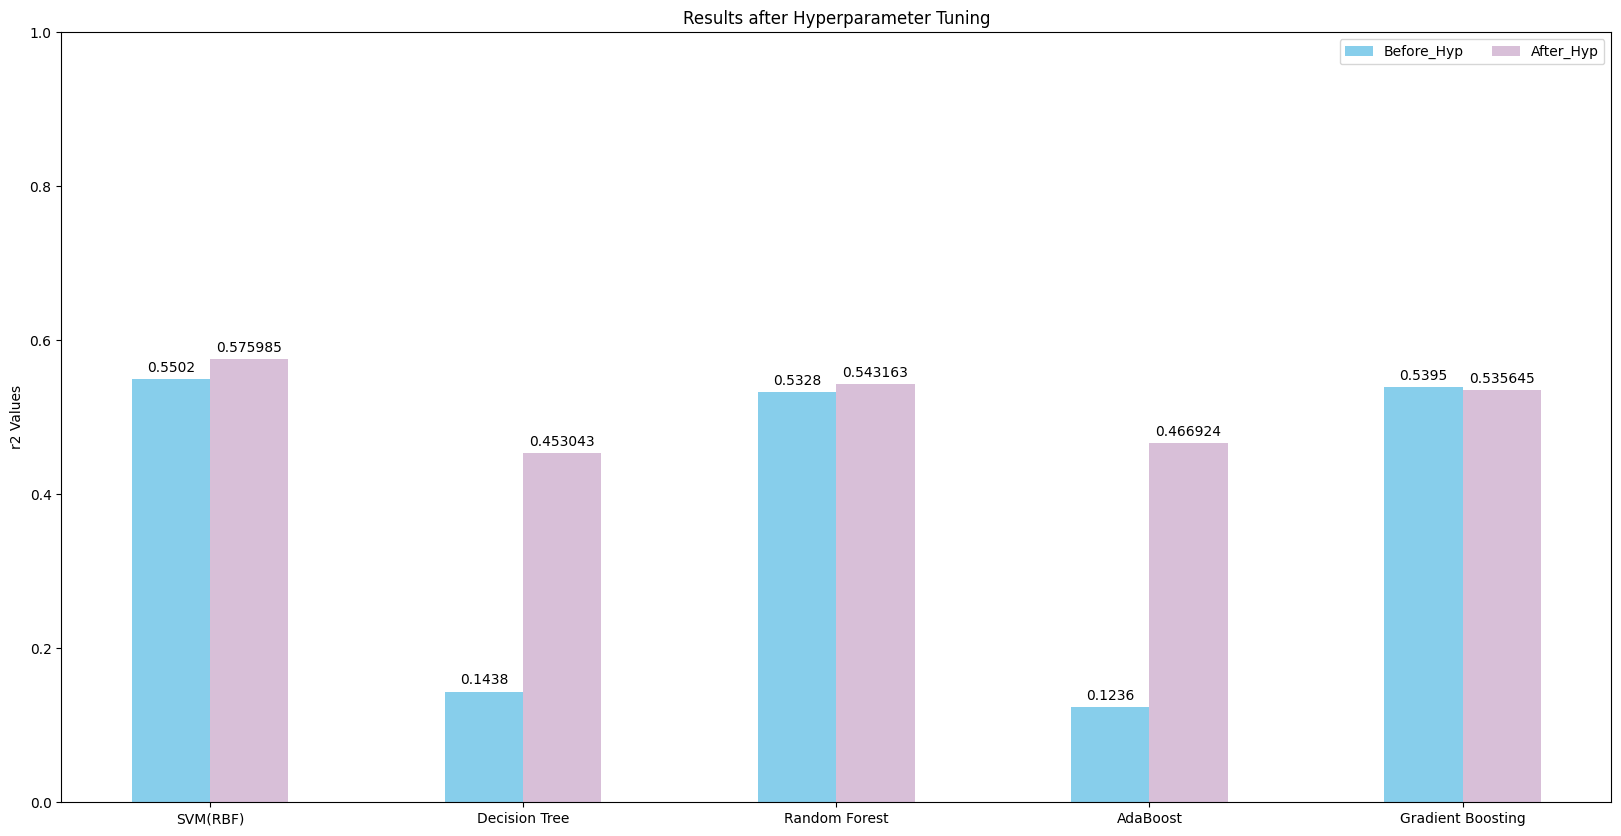

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Results after Hyperparameter Tuning
methods = ('SVM(RBF)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting')
d_results_plot = {
    'Before_Hyp': [0.5502, 0.1438, 0.5328, 0.1236, 0.5395],
    'After_Hyp': [score_svm_rbf, score_dt, score_rand_for, score_ada_boost_, score_grd_boost]
}

X = np.arange(len(methods))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 10))

for attribute, measurement in d_results_plot.items():
    offset = width * multiplier
    if attribute == 'Before_Hyp':
        rects = ax.bar(X + offset, measurement, width, label=attribute, color='skyblue')
    else:
        rects = ax.bar(X + offset, measurement, width, label=attribute, color='thistle')
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('r2 Values')
ax.set_title('Results after Hyperparameter Tuning')
ax.set_xticks(X + width / 2)
ax.set_xticklabels(methods)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 1)
plt.savefig("output1.jpg")
plt.show()


# Feature Reduction

In [70]:
!pip install scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]))
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(3132, 9)
(1045, 9)


In [ ]:
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = hpt_param_grid,
                          cv = 5)

In [ ]:
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [ ]:
newscore = grid_search.score(X_test_pca,y_test)
print(newscore)

0.5698455708703736


# Feature selection

In [22]:
from sklearn.feature_selection import SelectPercentile, f_regression

fs = SelectPercentile(score_func=f_regression,percentile=50)
X_train_fs = fs.fit_transform(X_train,y_train)
X_test_fs = fs.transform(X_test)

print(X_train_fs.shape)
print(X_test_fs.shape)

(3132, 4)
(1045, 4)


In [23]:
fs.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x6'], dtype=object)

In [24]:
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = hpt_param_grid,
                          cv = 5)
grid_search.fit(X_train_fs,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [25]:
score_fs = grid_search.score(X_test_fs,y_test)
print(score_fs)

0.4589022715343374


# Data Visualization

In [71]:
#T-SNE
from sklearn.manifold import TSNE
tsne_1 = TSNE(n_components=2,init='pca',learning_rate='auto')
X_train_std_tsne = tsne_1.fit_transform(X_train)
print(X_train_std_tsne.shape)

(3132, 2)


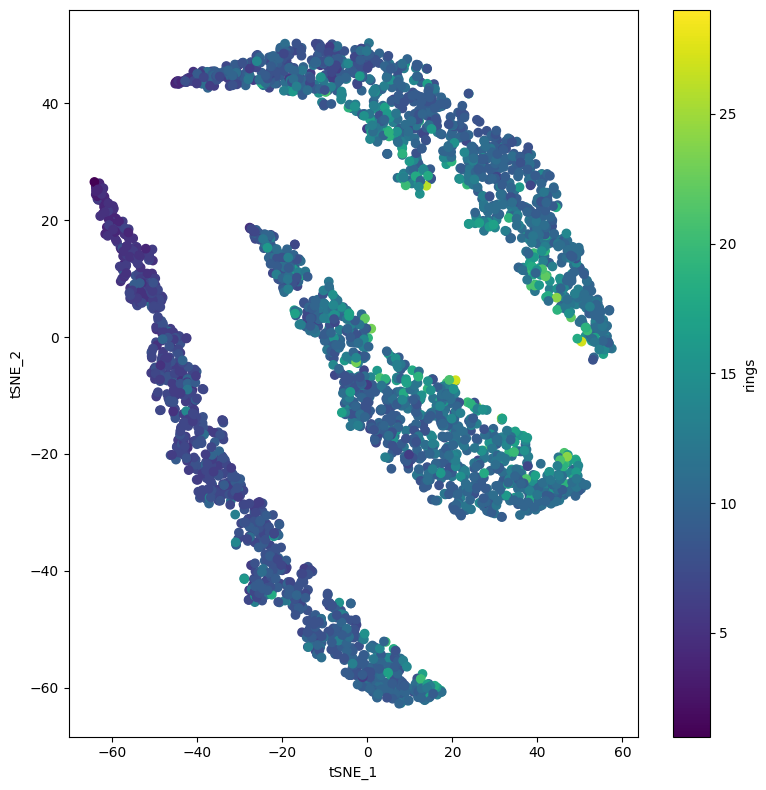

In [72]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(X_train_std_tsne[:, 0], X_train_std_tsne[:, 1], c=y_train, cmap='viridis', marker='o')

ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")

colorbar = plt.colorbar(scatter)
colorbar.set_label('rings')

plt.tight_layout()
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

0.7038719654083252

In [42]:
!pip install plotly
import plotly.express as px

fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()